In [13]:
from selenium import webdriver # webdriver模擬瀏覽器的操作

from selenium.webdriver.edge.service import Service # 使用Edge瀏覽器

from webdriver_manager.microsoft import EdgeChromiumDriverManager # 瀏覽器版本會更新

driver = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install())) #控管瀏覽器版本

driver.get('https://tianqi.2345.com/')

import time
time.sleep(10)
from selenium.webdriver.common.by import By
tag = driver.find_element(By.XPATH,'//*[@id="J_bannerList"]')
print(tag.text)
#關閉遊覽器
driver.quit()


昨天
06/26
阴
26~32°
今天
06/27
阴
26~33°
明天
06/28
小雨
26~31°
周六
06/29
小雨
26~31°
周日
06/30
阴
26~31°
周一
07/01
多云
26~32°
周二
07/02
小雨
25~31°
周三
07/03
小雨
25~31°


In [14]:
import pandas as pd


dists = {
    "日期": ["06/22", "6/23", "6/24", "6/25", "6/26", "6/27", "6/28", "6/29"],
    "天氣": ["晴", "阴", "小雨", "小雨", "多云", "阴", "小雨", "小雨"],
    "溫度": ["26~32°", "26~32°", "25~30°", "25~30°", "25~30°", "26~30°", "25~30°", "26~30°"]
}


df = pd.DataFrame(dists)


print(df)
df.to_csv('weather_data.csv', index=False, encoding='utf-8-sig')


      日期  天氣      溫度
0  06/22   晴  26~32°
1   6/23   阴  26~32°
2   6/24  小雨  25~30°
3   6/25  小雨  25~30°
4   6/26  多云  25~30°
5   6/27   阴  26~30°
6   6/28  小雨  25~30°
7   6/29  小雨  26~30°


C:\Users\adamf\AppData\Local\Temp\ipykernel_12196\1201067496.py:29: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\adamf\AppData\Local\Temp\ipykernel_12196\1201067496.py:29: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\adamf\AppData\Local\Temp\ipykernel_12196\1201067496.py:29: UserWarning: Glyph 28331 (\N{CJK UNIFIED IDEOGRAPH-6EAB}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\adamf\AppData\Local\Temp\ipykernel_12196\1201067496.py:29: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\adamf\AppData\Local\Temp\ipykernel_12196\1201067496.py:29: UserWarning: Glyph 21488 (\N{CJK UNIFIED IDEOGRAPH-53F0}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\adamf\AppData\Local\Temp\ipykernel_12196\1201067496.py:29: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317})

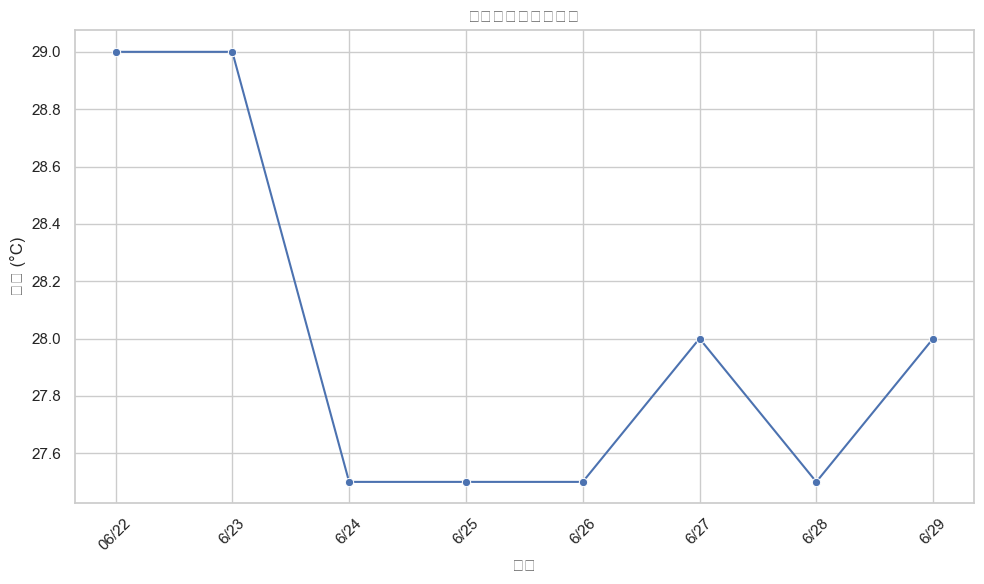

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



dists = {
    "日期": ["06/22", "6/23", "6/24", "6/25", "6/26", "6/27", "6/28", "6/29"],
    "天氣": ["晴", "阴", "小雨", "小雨", "多云", "阴", "小雨", "小雨"],
    "溫度": ["26~32°", "26~32°", "25~30°", "25~30°", "25~30°", "26~30°", "25~30°", "26~30°"]
}


df = pd.DataFrame(dists)


df['溫度'] = df['溫度'].str.replace('°', '').str.split('~').apply(lambda x: (int(x[0]) + int(x[1])) / 2)


sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='日期', y='溫度', marker='o', color='b')
plt.xlabel('日期')
plt.ylabel('溫度 (°C)')
plt.title('台北每日溫度折線圖')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [16]:
from flask import Flask , render_template
from flask_sqlalchemy import SQLAlchemy

db = SQLAlchemy()

app = Flask(__name__)

app.config['SQLALCHEMY_DATABASE_URI'] = 'mssql+pyodbc:///?' \
    'driver=ODBC+Driver+17+for+SQL Server&' \
    'trusted_connection=yes&' \
    'server=DESKTOP-D796N6P&' \
    'database=testdb1'

db.init_app(app)

class Sid(db.Model):
    __tablename__ = 'sid'
    id = db.Column(db.Integer, primary_key=True)
    date = db.Column(db.String(50))
    weather = db.Column(db.String(200))
    temperature = db.Column(db.String(100))

    def __init__(self, date, weather, temperature):
        self.date = date
        self.weather = weather
        self.temperature = temperature

@app.route('/')
def index():
    with app.app_context():
        db.create_all()
    return "数据库连接成功！"

@app.route('/insertall')
def insertall():
    datas = [
        Sid("06/22", "晴", "26~32°"),
        Sid("06/23", "陰", "26~32°"),
        Sid("06/24", "小雨", "25~30°"),
        Sid("06/25", "小雨", "25~30°"),
        Sid("06/26", "多雲", "25~30°"),
        Sid("06/27", "陰", "26~30°"),
        Sid("06/28", "小雨", "25~30°"),
        Sid("06/29", "小雨", "26~30°")
    ]

    db.session.add_all(datas)
    db.session.commit()
    return "数据批量插入成功！"
@app.route('/queryall')
def queryall():
    
    datas = Sid.query.all()

    return render_template('index.html',data=datas)

if __name__ == '__main__':
    app.run(host='192.168.168.10', port=5000, debug=False)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://192.168.168.10:5000
Press CTRL+C to quit
192.168.168.10 - - [27/Jun/2024 21:17:36] "GET / HTTP/1.1" 200 -
192.168.168.10 - - [27/Jun/2024 21:17:51] "GET /insetall HTTP/1.1" 404 -
192.168.168.10 - - [27/Jun/2024 21:17:58] "GET /insertall HTTP/1.1" 200 -
192.168.168.10 - - [27/Jun/2024 21:18:50] "GET /queryall HTTP/1.1" 200 -
192.168.168.10 - - [27/Jun/2024 21:18:50] "GET /output.png HTTP/1.1" 404 -
